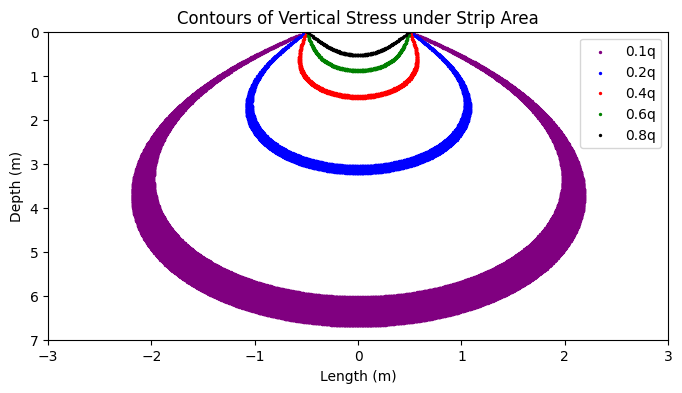

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# delta_sigma_nu hesaplama fonksiyonu
def delta_sigma_nu(alpha, beta, q):
    return (q / np.pi) * (alpha + np.sin(alpha) * np.cos(alpha + 2 * beta))

# x ekseni değerlerini belirle
#q = 100 kPa dene
#B = 1 m dene
q = input("Enter the load(kPa): ")
B = input("Enter the width of the area(m): ")
q = int(q)
B = int(B)

x_ref1 = -B*0.5
x_ref2 = B*0.5

x_values = np.linspace(-B*3, B*3, 1000)
y_values = np.linspace(0, 8, 1000)

# Koordinatları ayrı listede sakla
xy_values_1 = []
xy_values_2 = []
xy_values_4 = []
xy_values_6 = []
xy_values_8 = []

for x_value in x_values:
    if x_ref1 <= x_value <= x_ref2:
        x1 = x_value - x_ref1
        x2 = x_ref2 - x_value
        beta = 0
        for y_value in y_values:
            if y_value != 0:
                alpha_values1 = np.arctan(x1 / y_value)
                alpha_values2 = np.arctan(x2 / y_value)
                alpha = alpha_values1 + alpha_values2
                beta = -alpha_values2

                a = delta_sigma_nu(alpha, beta, q)
                a = np.round(a, 0)
                if a == q*0.4:
                    # q*0.4 olan koordinatları sakla
                    xy_values_4.append([x_value, y_value])
                if a == q*0.2:
                    xy_values_2.append([x_value, y_value])
                if a == q*0.6:
                     xy_values_6.append([x_value, y_value])
                if a == q*0.8:
                     xy_values_8.append([x_value, y_value])
                if a == q*0.1:
                     xy_values_1.append([x_value, y_value])
    if  x_value > B*0.5:
        x1 = B
        x2 = x_value - x_ref2
        x_total = B + x2
        for y_value in y_values:
            if y_value != 0:
                beta = np.arctan(x2 / y_value)
                alpha_betaplus = np.arctan(x_total / y_value)
                alpha = alpha_betaplus - beta

                # q bizim vertical stressimiz
                a = delta_sigma_nu(alpha, beta, q)
                a = np.round(a, 0)
                if a == q*0.4:
                    # q*0.4 olan koordinatları sakla
                    xy_values_4.append([x_value, y_value])
                if a == q*0.2:
                    # q*0.2 olan koordinatları sakla
                    xy_values_2.append([x_value, y_value])
                if a == q*0.6:
                     xy_values_6.append([x_value, y_value])
                if a == q*0.8:
                     xy_values_8.append([x_value, y_value])
                if a == q*0.1:
                     xy_values_1.append([x_value, y_value])
    if  x_value < -B*0.5:
        x1 = x_ref1 - x_value
        x2 = B
        x_total = B + x1
        for y_value in y_values:
            if y_value != 0:
                beta = np.arctan(x1 / y_value)
                alpha_betaplus = np.arctan(x_total / y_value)
                alpha = alpha_betaplus - beta
                a = delta_sigma_nu(alpha, beta, q)
                a = np.round(a, 0)
                if a == q*0.4:
                    # q*0.4 olan koordinatları sakla
                    xy_values_4.append([x_value, y_value])
                if a == q*0.2:
                    # q*0.2 olan koordinatları sakla
                    xy_values_2.append([x_value, y_value])
                if a == q*0.6:
                     xy_values_6.append([x_value, y_value])
                if a == q*0.8:
                     xy_values_8.append([x_value, y_value])
                if a == q*0.1:
                     xy_values_1.append([x_value, y_value])


# x ve y değerlerini ayrı ayrı listele
x_coords_2 = [coord[0] for coord in xy_values_2]
y_coords_2 = [coord[1] for coord in xy_values_2]

x_coords_4 = [coord[0] for coord in xy_values_4]
y_coords_4 = [coord[1] for coord in xy_values_4]

x_coords_6 = [coord[0] for coord in xy_values_6]
y_coords_6 = [coord[1] for coord in xy_values_6]

x_coords_8 = [coord[0] for coord in xy_values_8]
y_coords_8 = [coord[1] for coord in xy_values_8]

x_coords_1 = [coord[0] for coord in xy_values_1]
y_coords_1 = [coord[1] for coord in xy_values_1]

# Grafiği oluşturma
plt.figure(figsize=(8, 4))

# delta sigma q*0.1 olan koordinatlar için çizgi grafiği
plt.scatter(x_coords_1, y_coords_1, color='purple',label="0.1q",s=2)

plt.scatter(x_coords_2, y_coords_2, color='blue',label="0.2q",s=2)

plt.scatter(x_coords_4, y_coords_4, color='red',label="0.4q",s=2)

plt.scatter(x_coords_6, y_coords_6, color='green', label="0.6q",s=2)

plt.scatter(x_coords_8, y_coords_8, color='black', label="0.8q",s=2)



# Eksen etiketleri ve başlık
plt.title('Contours of Vertical Stress under Strip Area')
plt.xlabel('Length (m)')
plt.ylabel('Depth (m)')

# Grafik sınırlarının ayarlanması
plt.xlim(-3, 3)
plt.ylim(7, 0)  # Depth (m) ters çevrilmiş olmalı

# Grafik için efsane
plt.legend()

# Grafiği göster
plt.grid(False)
plt.show()